In [3]:
#import required libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Load  the datasets (cusine, userprofile and rating)
cusine = pd.read_csv("chefmozcuisine.csv")
rating = pd.read_csv("rating_final.csv")
userprofile = pd.read_csv("userprofile.csv")

In [5]:
# defining the current year manually
current_year = 2026
# Convert birth year into age
userprofile["age"] = current_year - userprofile["birth_year"]

In [6]:
# Merge the rating data set with userprofile using userID
data = rating.merge(userprofile, on="userID")
# Merge the result with  the cusine using placeID
data = data.merge(cusine, on="placeID")

data.dropna
data.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,interest,personality,religion,activity,color,weight,budget,height,age,Rcuisine
0,U1077,135085,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71,39,Fast_Food
1,U1077,132825,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71,39,Mexican
2,U1077,135060,1,2,2,22.156469,-100.985540,false,social drinker,elegant,...,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71,39,Seafood
3,U1068,135104,1,1,2,23.752269,-99.168605,false,casual drinker,informal,...,technology,thrifty-protector,Catholic,student,blue,72,low,1.57,38,Mexican
4,U1068,132740,0,0,0,23.752269,-99.168605,false,casual drinker,informal,...,technology,thrifty-protector,Catholic,student,blue,72,low,1.57,38,Mexican


In [7]:
# Feature input age of the user
X = data[["age"]] 
# target cusine type
y = data["Rcuisine"]

In [8]:
# Encode cusine names into numberic labels for ML modesl
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [9]:
# Split the dataset into training and testing tests. 80% for trainning and 20% for teting.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [10]:
# create KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(X_train, y_train)
# Predict cusine for test data
knn_pred = knn.predict(X_test)
#  calculate accuracy
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.22009569377990432


In [11]:
# create decision tree model
decisiontree = DecisionTreeClassifier(random_state=42)
# train the model
decisiontree.fit(X_train, y_train)
# Predict cusine
decisiontree_pred = decisiontree.predict(X_test)
#  calculate accuracy
decisiontree_acc = accuracy_score(y_test, decisiontree_pred)
print("Decision Tree Accuracy:", decisiontree_acc)

Decision Tree Accuracy: 0.23923444976076555


In [12]:
# create random forest model
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
# train the model
randomforest.fit(X_train, y_train)
# Predict cusine
randomforest_pred = randomforest.predict(X_test)
#  calculate accuracy
randomforest_acc = accuracy_score(y_test, randomforest_pred)

print("Random Forest Accuracy:",randomforest_acc) 

Random Forest Accuracy: 0.22009569377990432


<function matplotlib.pyplot.show(close=None, block=None)>

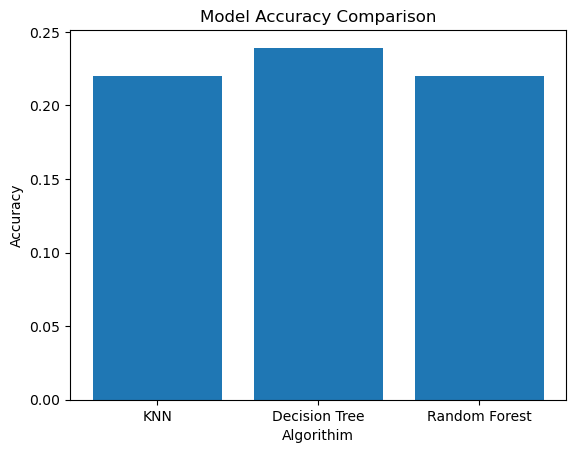

In [13]:
models = ["KNN", "Decision Tree", "Random Forest"]
accuracies = [knn_acc, decisiontree_acc, randomforest_acc]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Algorithim")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show

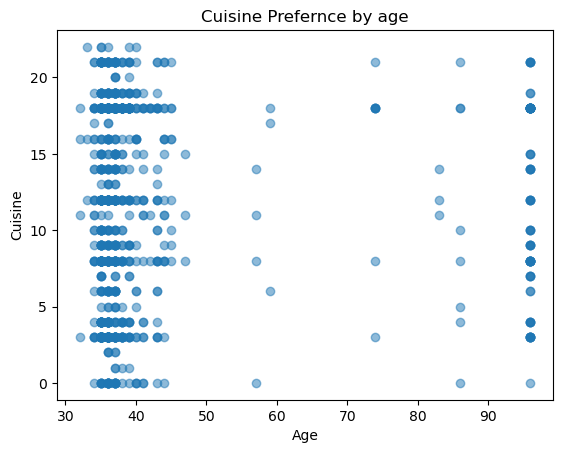

In [14]:
plt.figure()
plt.scatter(data["age"], y_encoded, alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Cuisine")
plt.title("Cuisine Prefernce by age")
plt.show()

In [33]:
# Function to classify age into an age group
def get_age_group(age):
    """
    Categorizes user age into predefined age groups.
    """
    if age < 18:
        return "Under 18"
    elif 18 <= age <= 30:
        return "18–30"
    elif 31 <= age <= 45:
        return "31–45"
    elif 46 <= age <= 60:
        return "46–60"
    else:
        return "60+"


def recommend_food_by_age(age, top_n=5):
    age_group = get_age_group(age)

    # Filter users based on age group
    if age_group == "Under 18":
        filtered = data[data["age"] < 18]
    elif age_group == "18–30":
        filtered = data[(data["age"] >= 18) & (data["age"] <= 30)]
    elif age_group == "31–45":
        filtered = data[(data["age"] >= 31) & (data["age"] <= 45)]
    elif age_group == "46–60":
        filtered = data[(data["age"] >= 46) & (data["age"] <= 60)]
    else:
        filtered = data[data["age"] > 60]

    # check if data exists
    if filtered.empty:
        return age_group, None

    # Calculate average rating per cuisine
    recommendations = (
        filtered
        .groupby("Rcuisine")["rating"]
        .mean()
        .reset_index()
        .sort_values(by="rating", ascending=False)
        .head(top_n)
    )

    return age_group, recommendations


In [36]:
user_age = int(input("Enter your age: "))

age_group, food_list = recommend_food_by_age(user_age)

print(f"Age Group: {age_group}")
print("Recommended Foods with Ratings:")

if food_list is None or food_list.empty:
    print("No recommendations available for this age group.")
else:
    for _, row in food_list.iterrows():
        print(f"{row['Rcuisine']} → Rating: {row['rating']:.2f}")


Enter your age:  31


Age Group: 31–45
Recommended Foods with Ratings:
Mediterranean → Rating: 1.67
Family → Rating: 1.55
Cafe-Coffee_Shop → Rating: 1.50
International → Rating: 1.43
Game → Rating: 1.43
